In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

bond_ratings = pd.read_csv('bond_ratings.csv')
bond_ratings.head()

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
0,0.0,0.0,0.0,0.0,NaN,0.0,67922,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN,0.0,134783,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN,0.0,61271,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN,0.0,64412,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,NaN,0.0,184058,0.0,0.0,0.0,0.0,NaN


In [2]:
bond_ratings.dtypes

bb_rating              float64
us_govt_bond_rating    float64
below_b_rating         float64
others_rating          float64
maturity_bond          float64
b_rating               float64
tag                      int64
a_rating               float64
aaa_rating             float64
aa_rating              float64
bbb_rating             float64
duration_bond          float64
dtype: object

In [3]:
bond_ratings.describe()

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond
count,24886.000000,24886.0,24886.000000,24886.000000,8093.000000,24886.000000,25000.000000,24886.000000,24886.000000,24886.000000,24886.000000,9874.000000
mean,3.473804,0.0,0.827525,1.666769,7.765444,3.234399,139878.934640,5.054436,14.558310,4.209073,6.126260,4.643082
std,8.299747,0.0,2.700019,6.885158,4.148558,9.197164,65731.287074,9.261811,25.636838,11.164511,10.597962,2.267122
min,0.000000,0.0,-0.020000,-68.210000,0.000000,-0.120000,26000.000000,0.000000,-3.150000,-0.190000,0.000000,-3.010000
25%,0.000000,0.0,0.000000,0.000000,5.460000,0.000000,83021.750000,0.000000,0.000000,0.000000,0.000000,3.500000
50%,0.000000,0.0,0.000000,0.000000,7.290000,0.000000,139881.500000,0.000000,0.000000,0.000000,0.000000,4.800000
75%,2.450000,0.0,0.100000,0.330000,8.920000,0.710000,196759.250000,8.340000,18.955000,3.010000,11.390000,5.760000
max,80.470000,0.0,42.300000,100.000000,29.300000,80.680000,253763.000000,72.870000,118.650000,90.220000,98.000000,25.000000


In [4]:
bond_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
bb_rating              24886 non-null float64
us_govt_bond_rating    24886 non-null float64
below_b_rating         24886 non-null float64
others_rating          24886 non-null float64
maturity_bond          8093 non-null float64
b_rating               24886 non-null float64
tag                    25000 non-null int64
a_rating               24886 non-null float64
aaa_rating             24886 non-null float64
aa_rating              24886 non-null float64
bbb_rating             24886 non-null float64
duration_bond          9874 non-null float64
dtypes: float64(11), int64(1)
memory usage: 2.3 MB


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


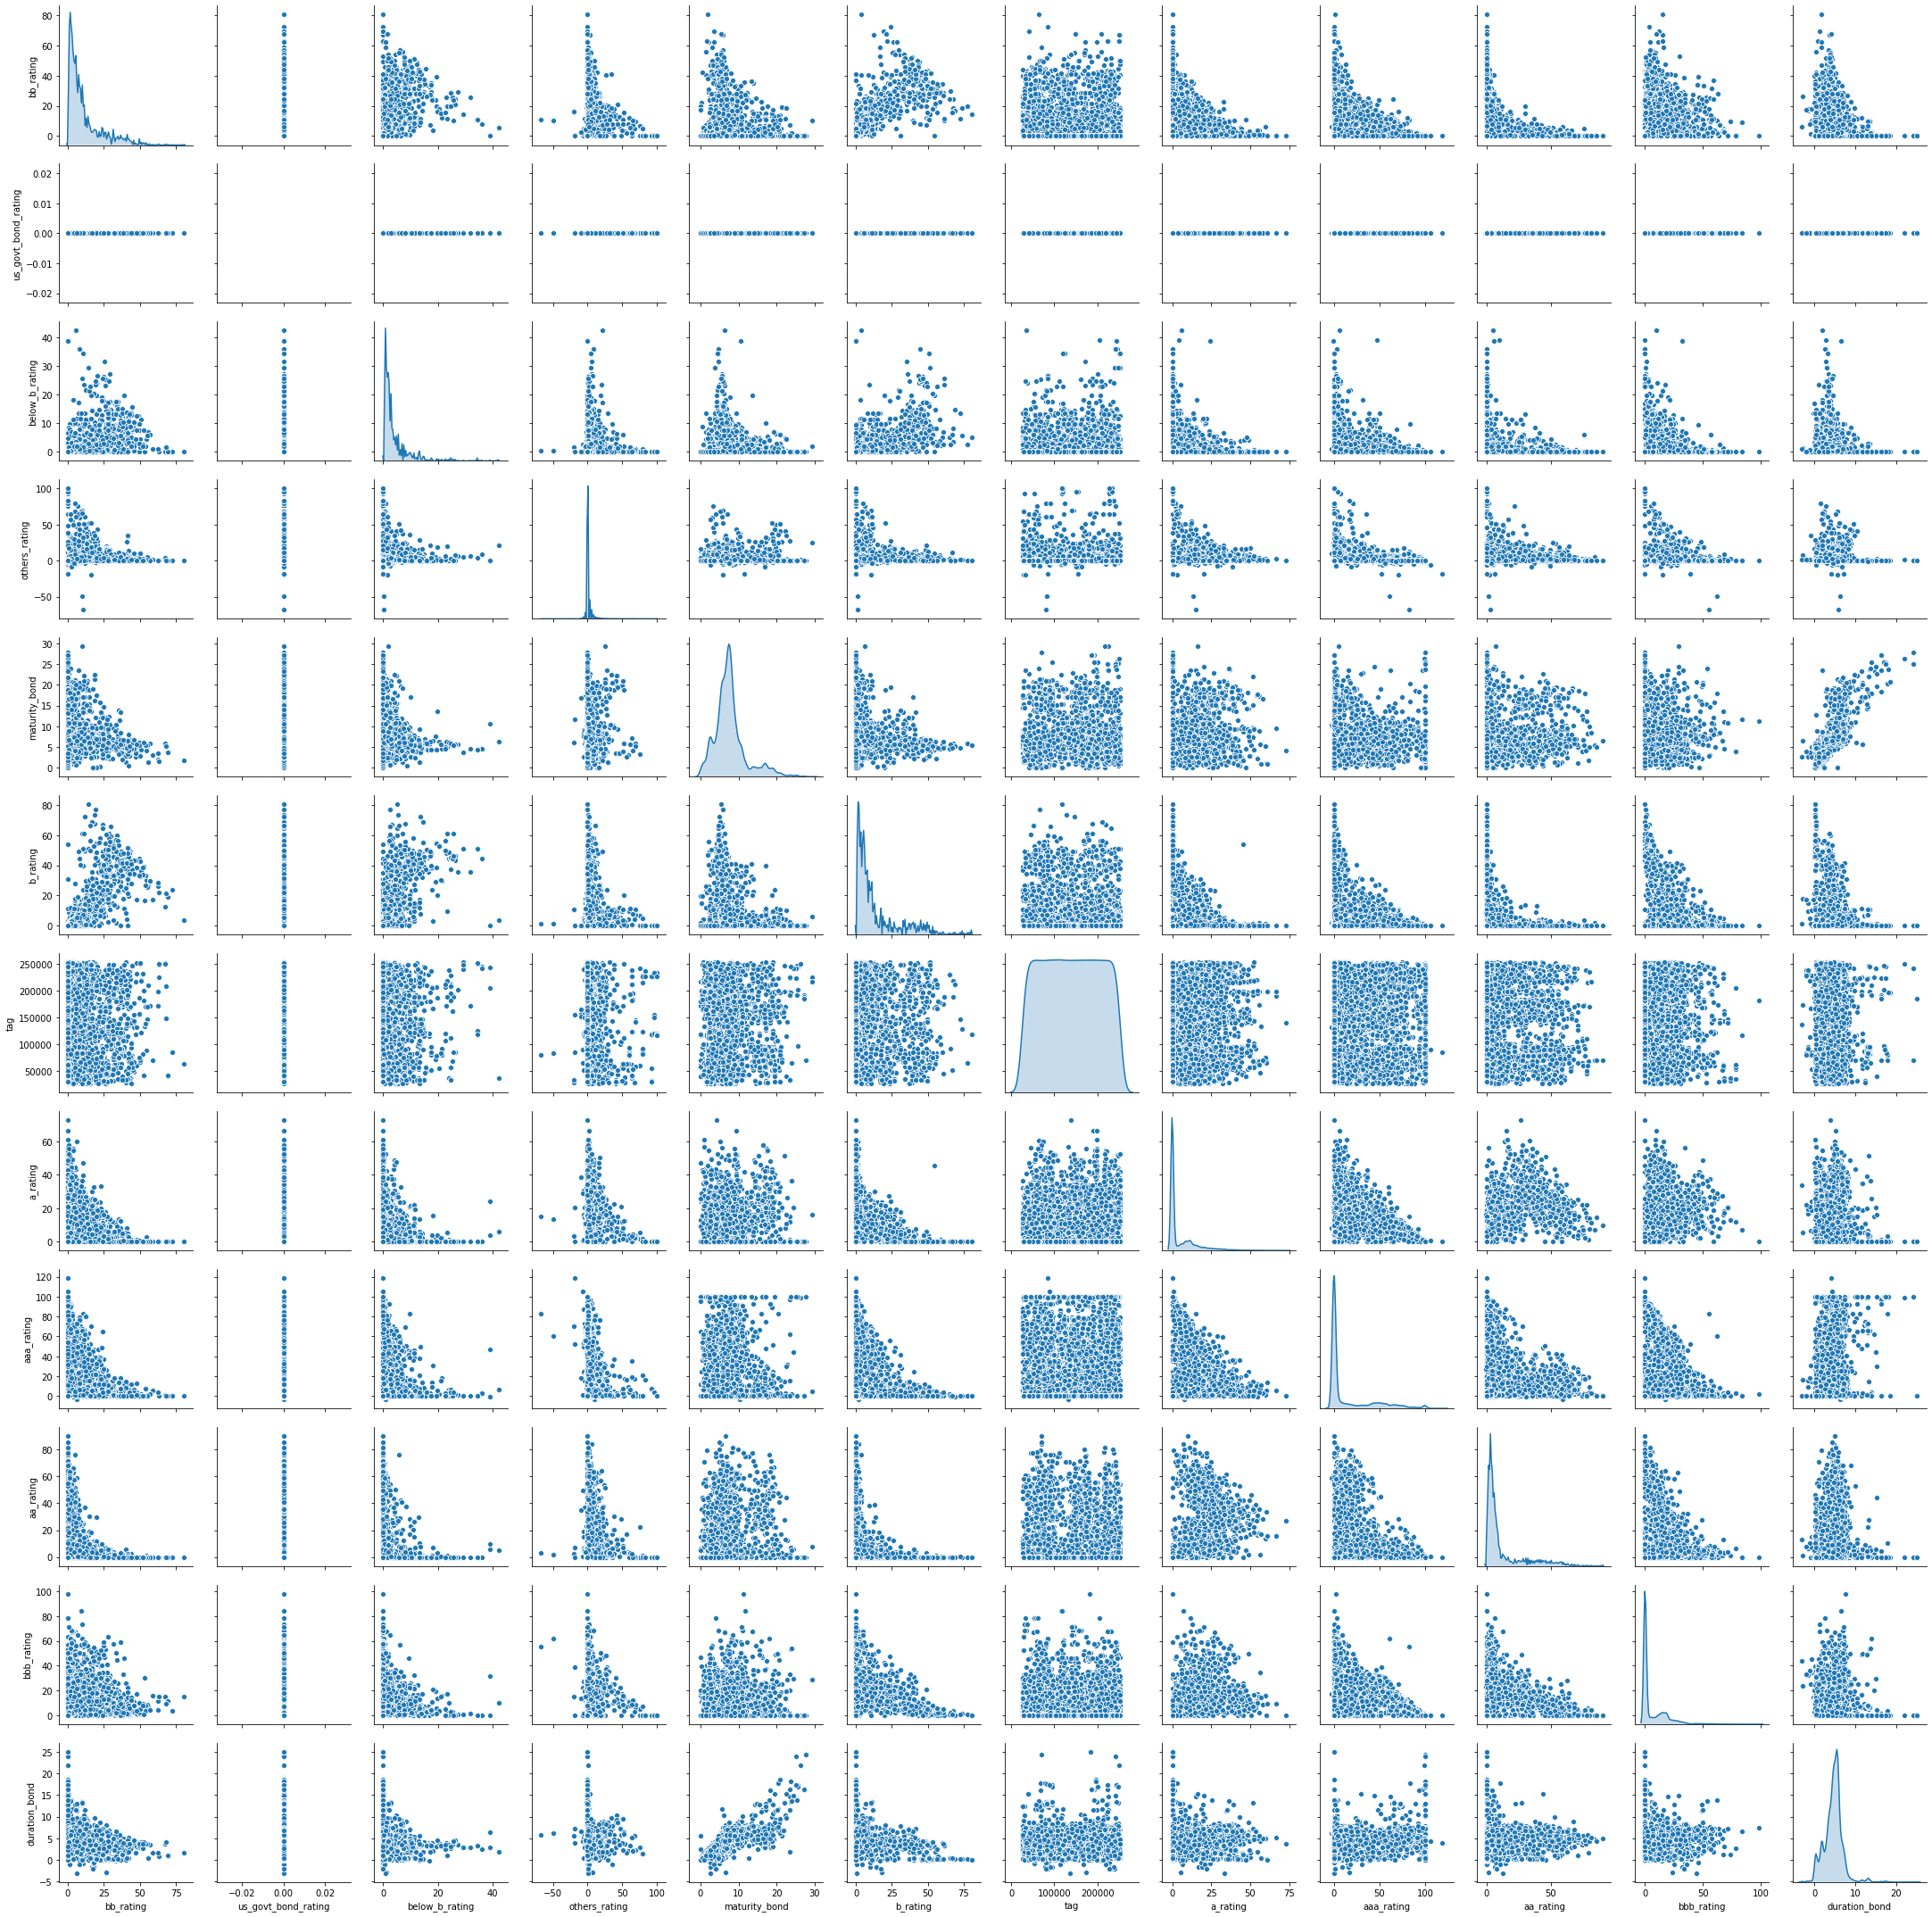

In [6]:
import seaborn as sns
sns.pairplot(bond_ratings,diag_kind='kde')

In [3]:
bond_ratings_1= bond_ratings.drop(columns=['maturity_bond','duration_bond'])
bond_ratings_1.isnull().sum()

bb_rating              114
us_govt_bond_rating    114
below_b_rating         114
others_rating          114
b_rating               114
tag                      0
a_rating               114
aaa_rating             114
aa_rating              114
bbb_rating             114
dtype: int64

In [18]:
tags_null_inbr1= np.array(bond_ratings_1['tag'][bond_ratings_1['bb_rating'].isnull()])

In [5]:
fund_all =pd.read_csv('fund_allocations.csv')

In [9]:
fund_all.head()

,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation
0,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,67922,0.00,0.00
1,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783,0.39,17.38
2,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,61271,0.00,7.09
3,6.53,13.80,10.91,0.16,2.22,6.79,25.73,9.00,0.00,64412,19.42,5.43
4,3.49,13.95,10.51,19.26,3.75,5.11,7.29,12.22,10.41,184058,3.07,10.95


In [10]:
fund_all.dtypes

portfolio_communication_allocation        float64
portfolio_financial_services              float64
portfolio_industrials_allocation          float64
portfolio_tech_allocation                 float64
portfolio_materials_basic_allocation      float64
portfolio_energy_allocation               float64
portfolio_consumer_defence_allocation     float64
portfolio_healthcare_allocation           float64
portfolio_property_allocation             float64
id                                          int64
portfolio_utils_allocation                float64
portfolio_cyclical_consumer_allocation    float64
dtype: object

In [13]:
fund_all.describe()

,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation
count,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,25000.000000,24886.000000,24886.000000
mean,2.272270,11.838126,9.055996,12.780061,3.898250,5.826646,5.111333,8.536916,4.926447,139878.934640,2.761792,9.211606
std,4.404629,12.286453,10.170428,12.558221,8.136322,13.687201,6.078521,9.618490,13.855415,65731.287074,7.594429,9.700984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26000.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83021.750000,0.000000,0.000000
50%,1.180000,13.120000,9.570000,12.885000,2.790000,3.380000,4.840000,9.370000,1.550000,139881.500000,0.430000,10.460000
75%,3.410000,17.910000,12.750000,19.650000,5.060000,6.250000,7.880000,13.560000,4.440000,196759.250000,3.340000,13.210000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,253763.000000,100.000000,100.000000


In [19]:
fund_all.isnull().sum()

portfolio_communication_allocation        114
portfolio_financial_services              114
portfolio_industrials_allocation          114
portfolio_tech_allocation                 114
portfolio_materials_basic_allocation      114
portfolio_energy_allocation               114
portfolio_consumer_defence_allocation     114
portfolio_healthcare_allocation           114
portfolio_property_allocation             114
id                                          0
portfolio_utils_allocation                114
portfolio_cyclical_consumer_allocation    114
dtype: int64

In [25]:
id_null= np.array(fund_all['id'][fund_all['portfolio_communication_allocation'].isnull()])

In [26]:
tags_null_inbr1 == id_null

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

So 114 mutual funds have null values in fund allocations and bond ratings

In [6]:
Merge1 =pd.merge(bond_ratings_1,fund_all,how='left',left_on='tag',right_on='id')
Merge1.head()

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,...,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation
0,0.0,0.0,0.0,0.0,0.0,67922,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,100.00,0.00,0.00,0.00,67922,0.00,0.00
1,0.0,0.0,0.0,0.0,0.0,134783,0.0,0.0,0.0,0.0,...,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783,0.39,17.38
2,0.0,0.0,0.0,0.0,0.0,61271,0.0,0.0,0.0,0.0,...,11.45,25.09,8.36,0.00,9.42,16.47,1.03,61271,0.00,7.09
3,0.0,0.0,0.0,0.0,0.0,64412,0.0,0.0,0.0,0.0,...,10.91,0.16,2.22,6.79,25.73,9.00,0.00,64412,19.42,5.43
4,0.0,0.0,0.0,0.0,0.0,184058,0.0,0.0,0.0,0.0,...,10.51,19.26,3.75,5.11,7.29,12.22,10.41,184058,3.07,10.95


In [45]:
Merge1.drop(columns=['id'],inplace=True)
Merge1.dtypes

bb_rating                                 float64
us_govt_bond_rating                       float64
below_b_rating                            float64
others_rating                             float64
b_rating                                  float64
tag                                         int64
a_rating                                  float64
aaa_rating                                float64
aa_rating                                 float64
bbb_rating                                float64
portfolio_communication_allocation        float64
portfolio_financial_services              float64
portfolio_industrials_allocation          float64
portfolio_tech_allocation                 float64
portfolio_materials_basic_allocation      float64
portfolio_energy_allocation               float64
portfolio_consumer_defence_allocation     float64
portfolio_healthcare_allocation           float64
portfolio_property_allocation             float64
portfolio_utils_allocation                float64


In [7]:
fund_config = pd.read_csv('fund_config.csv')
fund_config.head()

,category,parent_company,fund_id,fund_name
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3


In [27]:
fund_config.isnull().sum()

category          0
parent_company    0
fund_id           0
fund_name         0
dtype: int64

In [14]:
fund_config1 = fund_config.drop(columns=['parent_company','fund_name'])
fund_config1 = pd.merge(fund_config1,fund_ratios,how='left',left_on='fund_id',right_on='fund_id')
fund_config1.head()

,category,fund_id,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio
0,Energy Limited Partnership,264614c6-5ac3-4146-ba26-1674b136cb40,67922,1.44,1.71,1.31,"19,857.41",5.91,14.51
1,Large Growth,f5ad58c2-fdea-4087-8678-e04744f89f90,134783,0.58,5.30,3.38,"72,347.03",15.95,18.88
2,Large Growth,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,61271,0.99,5.40,3.67,"68,857.43",15.97,23.27
3,Large Value,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,64412,0.52,2.23,1.63,"43,266.62",8.93,12.7
4,Target-Date 2035,63d8406d-c525-494a-8e03-d4fc4cfcb571,184058,0.75,2.02,1.4,"43,747.9",7.59,14.74


In [15]:
fund_config1.drop(columns=['fund_ratio_net_annual_expense','pb_ratio','ps_ratio','mmc','pc_ratio','pe_ratio'], inplace=True)
fund_config1.head()

,category,fund_id,tag
0,Energy Limited Partnership,264614c6-5ac3-4146-ba26-1674b136cb40,67922
1,Large Growth,f5ad58c2-fdea-4087-8678-e04744f89f90,134783
2,Large Growth,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,61271
3,Large Value,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,64412
4,Target-Date 2035,63d8406d-c525-494a-8e03-d4fc4cfcb571,184058


In [41]:
fund_config1['category'].nunique()

111

In [16]:
Merge2 = pd.merge(Merge1,fund_config1,how='left',left_on='tag',right_on='tag')
Merge2.head()

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,...,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,category,fund_id
0,0.0,0.0,0.0,0.0,0.0,67922,0.0,0.0,0.0,0.0,...,0.00,100.00,0.00,0.00,0.00,67922,0.00,0.00,Energy Limited Partnership,264614c6-5ac3-4146-ba26-1674b136cb40
1,0.0,0.0,0.0,0.0,0.0,134783,0.0,0.0,0.0,0.0,...,2.86,0.38,5.88,14.41,2.67,134783,0.39,17.38,Large Growth,f5ad58c2-fdea-4087-8678-e04744f89f90
2,0.0,0.0,0.0,0.0,0.0,61271,0.0,0.0,0.0,0.0,...,8.36,0.00,9.42,16.47,1.03,61271,0.00,7.09,Large Growth,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4
3,0.0,0.0,0.0,0.0,0.0,64412,0.0,0.0,0.0,0.0,...,2.22,6.79,25.73,9.00,0.00,64412,19.42,5.43,Large Value,ff78bdd8-59eb-4cef-9f3c-b1baacce9554
4,0.0,0.0,0.0,0.0,0.0,184058,0.0,0.0,0.0,0.0,...,3.75,5.11,7.29,12.22,10.41,184058,3.07,10.95,Target-Date 2035,63d8406d-c525-494a-8e03-d4fc4cfcb571


In [9]:
fund_specs = pd.read_csv('fund_specs.csv')
fund_specs.head()

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
0,Value,USD,1.185000e+07,5.57,NaN,2015-02-02,67922,Large,20.19
1,Growth,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79
2,Growth,USD,2.660000e+09,0.02,4.0,1987-08-23,61271,Large,17.13
3,Value,USD,1.957000e+10,2.71,3.0,2005-10-24,64412,Large,11.63
4,Blend,USD,2.847000e+07,2.44,0.0,2016-12-12,184058,Large,10.25


In [30]:
fund_specs.isnull().sum()

investment_class     1480
currency                0
total_assets          119
yield                 127
greatstone_rating    5000
inception_date          0
tag                     0
fund_size            1480
return_ytd            108
dtype: int64

In [17]:
fund_specs_test = fund_specs[fund_specs['greatstone_rating'].isnull()]
fund_specs_train = fund_specs[fund_specs['greatstone_rating'].notnull()]

In [18]:
fund_specs_train.isnull().sum()

investment_class     1205
currency                0
total_assets           95
yield                 101
greatstone_rating       0
inception_date          0
tag                     0
fund_size            1205
return_ytd             86
dtype: int64

In [36]:
fund_specs_test.isnull().sum()

investment_class      275
currency                0
total_assets           24
yield                  26
greatstone_rating    5000
inception_date          0
tag                     0
fund_size             275
return_ytd             22
dtype: int64

In [48]:
fund_specs_train.shape

(20000, 9)

In [51]:
fund_specs_train.dtypes

investment_class      object
currency              object
total_assets         float64
yield                float64
greatstone_rating    float64
inception_date        object
tag                    int64
fund_size             object
return_ytd           float64
dtype: object

In [47]:
fund_specs_train.describe(include='all')

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
count,18795,20000,1.990500e+04,19899.000000,20000.000000,20000,20000.000000,18795,19914.000000
unique,3,1,NaN,NaN,NaN,4008,NaN,3,NaN
top,Blend,USD,NaN,NaN,NaN,2015-06-29,NaN,Large,NaN
freq,8217,20000,NaN,NaN,NaN,99,NaN,11305,NaN
mean,NaN,NaN,3.529833e+09,1.848717,2.839750,NaN,140262.491600,NaN,9.256368
std,NaN,NaN,1.903181e+10,1.774337,1.277439,NaN,65843.341729,NaN,5.784519
min,NaN,NaN,1.916000e+04,0.000000,0.000000,NaN,26000.000000,NaN,-36.300000
25%,NaN,NaN,9.242000e+07,0.470000,2.000000,NaN,83505.500000,NaN,4.400000
50%,NaN,NaN,4.379000e+08,1.660000,3.000000,NaN,140547.500000,NaN,9.810000
75%,NaN,NaN,1.620000e+09,2.635000,4.000000,NaN,197292.500000,NaN,13.060000


In [19]:
fund_specs_train.fillna(value={'investment_class':'Blend','total_assets':fund_specs_train['total_assets'].median(),'yield':fund_specs_train['yield'].mean(),'fund_size':'Large','return_ytd':9.256368},inplace=True)
fund_specs_train.isnull().sum()

investment_class     0
currency             0
total_assets         0
yield                0
greatstone_rating    0
inception_date       0
tag                  0
fund_size            0
return_ytd           0
dtype: int64

In [61]:
fund_specs_test.shape

(5000, 9)

In [62]:
fund_specs_test.dtypes

investment_class      object
currency              object
total_assets         float64
yield                float64
greatstone_rating    float64
inception_date        object
tag                    int64
fund_size             object
return_ytd           float64
dtype: object

In [60]:
fund_specs_test.describe(include='all')

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
count,4725,5000,4.976000e+03,4974.000000,0.0,5000,5000.000000,4725,4978.000000
unique,3,1,NaN,NaN,NaN,2010,NaN,3,NaN
top,Blend,USD,NaN,NaN,NaN,2012-05-17,NaN,Large,NaN
freq,2081,5000,NaN,NaN,NaN,29,NaN,2868,NaN
mean,NaN,NaN,3.262910e+09,1.857366,NaN,NaN,138344.706800,NaN,9.418963
std,NaN,NaN,1.486737e+10,1.919724,NaN,NaN,65265.154867,NaN,5.865382
min,NaN,NaN,1.068400e+05,0.000000,NaN,NaN,26018.000000,NaN,-24.600000
25%,NaN,NaN,9.380000e+07,0.490000,NaN,NaN,81626.750000,NaN,4.530000
50%,NaN,NaN,4.555000e+08,1.630000,NaN,NaN,137802.500000,NaN,9.850000
75%,NaN,NaN,1.690000e+09,2.677500,NaN,NaN,194252.750000,NaN,13.180000


In [20]:
fund_specs_test.fillna(value={'investment_class':'Blend','total_assets':fund_specs_test['total_assets'].median(),'yield':fund_specs_test['yield'].mean(),'fund_size':'Large','return_ytd':9.418963},inplace=True)
fund_specs_test.isnull().sum()

investment_class        0
currency                0
total_assets            0
yield                   0
greatstone_rating    5000
inception_date          0
tag                     0
fund_size               0
return_ytd              0
dtype: int64

In [21]:
Merge3_train=pd.merge(Merge2,fund_specs_train,left_on='tag',right_on='tag')
Merge3_test=pd.merge(Merge2,fund_specs_test,left_on='tag',right_on='tag')
print(Merge3_train.shape)
print(Merge3_test.shape)

(20000, 32)
(5000, 32)


In [13]:
fund_ratios = pd.read_csv('fund_ratios.csv')
fund_ratios.head()

,fund_id,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio
0,264614c6-5ac3-4146-ba26-1674b136cb40,67922,1.44,1.71,1.31,"19,857.41",5.91,14.51
1,f5ad58c2-fdea-4087-8678-e04744f89f90,134783,0.58,5.30,3.38,"72,347.03",15.95,18.88
2,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,61271,0.99,5.40,3.67,"68,857.43",15.97,23.27
3,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,64412,0.52,2.23,1.63,"43,266.62",8.93,12.7
4,63d8406d-c525-494a-8e03-d4fc4cfcb571,184058,0.75,2.02,1.4,"43,747.9",7.59,14.74


In [67]:
fund_ratios.isnull().sum()

fund_id                            0
tag                                0
fund_ratio_net_annual_expense      0
pb_ratio                         114
ps_ratio                         114
mmc                              114
pc_ratio                         114
pe_ratio                         114
dtype: int64

In [71]:
tag_null_r=np.array(fund_ratios['tag'][fund_ratios['pb_ratio'].isnull()])

In [72]:
tag_null_r ==id_null 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [22]:
Merge4_train=pd.merge(Merge3_train,fund_ratios,left_on='tag',right_on='tag')
Merge4_test=pd.merge(Merge3_test,fund_ratios,left_on='tag',right_on='tag')
print(Merge4_train.shape)
print(Merge4_test.shape)

(20000, 39)
(5000, 39)


In [23]:
other_specs = pd.read_csv('other_specs.csv')
other_specs.head()

,2014_category_return,2012_return_category,years_up,2018_return_category,tag,category_return_1year,cash_percent_of_portfolio,pc_ratio,2011_return_category,ytd_return_fund,...,2018_return_fund,2017_return_fund,greatstone_rating,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return
0,NaN,NaN,1.0,-16.32,67922,13.05,1.19,5.91,NaN,20.19,...,-12.23,-3.31,NaN,1.75,-34.98,4.12,0.00,0.00,NaN,NaN
1,10.00,15.34,5.0,-2.09,134783,10.71,0.10,15.95,NaN,16.79,...,-2.62,26.39,3.0,1.06,3.60,2.33,0.00,0.00,NaN,33.92
2,10.00,15.34,26.0,-2.09,61271,10.71,2.00,15.97,-2.46,17.13,...,5.04,25.79,4.0,1.06,3.60,3.77,0.58,0.08,15.53,33.92
3,10.21,14.57,11.0,-8.53,64412,4.48,6.13,8.93,-0.75,11.63,...,-7.54,8.53,3.0,1.00,-4.05,1.46,0.00,0.00,13.66,31.21
4,NaN,NaN,1.0,-7.04,184058,3.17,6.59,7.59,NaN,10.25,...,-7.37,17.52,0.0,0.45,NaN,1.28,24.97,0.02,NaN,NaN


In [74]:
other_specs.isnull().sum()

2014_category_return                  6183
2012_return_category                  9124
years_up                              1812
2018_return_category                   809
tag                                      0
category_return_1year                  115
cash_percent_of_portfolio              114
pc_ratio                               114
2011_return_category                 10533
ytd_return_fund                        115
years_down                            1641
2014_return_fund                      7206
category_return_1month                 115
2013_return_fund                      8538
fund_return_3months                    115
ytd_return_category                    115
pb_ratio                               114
2017_category_return                  1428
1_year_return_fund                     115
pe_ratio                               114
2015_return_fund                      5688
portfolio_convertable                  114
3_months_return_category               115
portfolio_o

In [75]:
other_specs.shape

(25000, 43)

In [24]:
other_specs1=other_specs.drop(columns=['2014_category_return','2012_return_category','2011_return_category','2014_return_fund','2013_return_fund','2015_return_fund','2016_return_fund','2016_return_category','2011_return_fund','2010_return_fund','2012_fund_return','2017_return_fund','category_return_2015','2010_return_category','2013_category_return'])

In [77]:
other_specs1.shape

(25000, 28)

In [25]:
other_specs1_train=other_specs1[other_specs1['greatstone_rating'].notnull()]
other_specs1_test=other_specs1[other_specs1['greatstone_rating'].isnull()]

In [26]:
Merge5_train=pd.merge(Merge4_train,other_specs1_train,left_on='tag',right_on='tag')
Merge5_test=pd.merge(Merge4_test,other_specs1_test,left_on='tag',right_on='tag')
print(Merge5_train.shape)
print(Merge5_test.shape)

(20000, 66)
(5000, 66)


In [27]:
return_10 = pd.read_csv('return_10year.csv')
return_10.head()

,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,fund_id,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,264614c6-5ac3-4146-ba26-1674b136cb40,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30
1,0.88,1.16,0.16,91.68,14.30,0.01,1.08,15.57,f5ad58c2-fdea-4087-8678-e04744f89f90,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94
2,0.88,1.22,1.00,90.69,12.68,0.01,0.95,16.58,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,0.01,0.15,16.21,-0.01,0.01,0.14,1.33,15.94
3,0.90,1.20,0.75,89.03,11.21,0.01,0.84,16.38,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,0.01,0.14,14.12,-0.02,0.01,0.13,1.16,13.68
4,0.97,NaN,NaN,NaN,NaN,0.01,NaN,NaN,63d8406d-c525-494a-8e03-d4fc4cfcb571,0.01,0.08,0.00,-0.02,0.01,0.12,NaN,11.53


In [95]:
return_10.dtypes

10years_category_r_squared              float64
10yrs_sharpe_ratio_fund                 float64
10_years_alpha_fund                     float64
10years_fund_r_squared                  float64
10years_fund_std                        float64
10yrs_sharpe_ratio_category             float64
10_years_beta_fund                      float64
10yrs_treynor_ratio_fund                 object
fund_id                                  object
10_years_return_mean_annual_category    float64
10yrs_treynor_ratio_category            float64
10_years_return_fund                    float64
10_years_alpha_category                 float64
10_years_beta_category                  float64
10years_category_std                    float64
10_years_return_mean_annual_fund        float64
10_years_return_category                float64
dtype: object

In [96]:
return_10.shape

(25000, 17)

In [97]:
return_10.isnull().sum()

10years_category_r_squared               106
10yrs_sharpe_ratio_fund                 8584
10_years_alpha_fund                     8584
10years_fund_r_squared                  8584
10years_fund_std                        8584
10yrs_sharpe_ratio_category              106
10_years_beta_fund                      8584
10yrs_treynor_ratio_fund                8584
fund_id                                    0
10_years_return_mean_annual_category     106
10yrs_treynor_ratio_category             106
10_years_return_fund                     115
10_years_alpha_category                  106
10_years_beta_category                   106
10years_category_std                     106
10_years_return_mean_annual_fund        8584
10_years_return_category                 115
dtype: int64

In [28]:
return_10_1 = return_10.drop(columns=['10yrs_sharpe_ratio_fund','10_years_alpha_fund','10years_fund_r_squared','10years_fund_std','10_years_beta_fund','10yrs_treynor_ratio_fund','10_years_return_mean_annual_fund'])
return_10_1.shape

(25000, 10)

In [102]:
Merge5_train.columns

Index(['bb_rating', 'us_govt_bond_rating', 'below_b_rating', 'others_rating',
       'b_rating', 'tag', 'a_rating', 'aaa_rating', 'aa_rating', 'bbb_rating',
       'portfolio_communication_allocation', 'portfolio_financial_services',
       'portfolio_industrials_allocation', 'portfolio_tech_allocation',
       'portfolio_materials_basic_allocation', 'portfolio_energy_allocation',
       'portfolio_consumer_defence_allocation',
       'portfolio_healthcare_allocation', 'portfolio_property_allocation',
       'portfolio_utils_allocation', 'portfolio_cyclical_consumer_allocation',
       'category', 'fund_id_x', 'investment_class', 'currency', 'total_assets',
       'yield', 'greatstone_rating_x', 'inception_date', 'fund_size',
       'return_ytd', 'fund_id_y', 'fund_ratio_net_annual_expense',
       'pb_ratio_x', 'ps_ratio_x', 'mmc_x', 'pc_ratio_x', 'pe_ratio_x',
       'years_up', '2018_return_category', 'category_return_1year',
       'cash_percent_of_portfolio', 'pc_ratio_y', 'ytd_re

In [29]:
Merge5_train.drop(columns=['fund_id_y','pc_ratio_y','pb_ratio_y','pe_ratio_y','mmc_y','ps_ratio_y','greatstone_rating_y'],inplace=True)
Merge5_train.rename(columns={'fund_id_x':'fund_id','greatstone_rating_x':'greatstone_rating','pb_ratio_x':'pb_ratio','ps_ratio_x':'ps_ratio','mmc_x':'mmc','pc_ratio_x':'pc_ratio','pe_ratio_x':'pe_ratio'},inplace=True)

In [104]:
Merge5_test.columns

Index(['bb_rating', 'us_govt_bond_rating', 'below_b_rating', 'others_rating',
       'b_rating', 'tag', 'a_rating', 'aaa_rating', 'aa_rating', 'bbb_rating',
       'portfolio_communication_allocation', 'portfolio_financial_services',
       'portfolio_industrials_allocation', 'portfolio_tech_allocation',
       'portfolio_materials_basic_allocation', 'portfolio_energy_allocation',
       'portfolio_consumer_defence_allocation',
       'portfolio_healthcare_allocation', 'portfolio_property_allocation',
       'portfolio_utils_allocation', 'portfolio_cyclical_consumer_allocation',
       'category', 'fund_id_x', 'investment_class', 'currency', 'total_assets',
       'yield', 'greatstone_rating_x', 'inception_date', 'fund_size',
       'return_ytd', 'fund_id_y', 'fund_ratio_net_annual_expense',
       'pb_ratio_x', 'ps_ratio_x', 'mmc_x', 'pc_ratio_x', 'pe_ratio_x',
       'years_up', '2018_return_category', 'category_return_1year',
       'cash_percent_of_portfolio', 'pc_ratio_y', 'ytd_re

In [30]:
Merge5_test.drop(columns=['fund_id_y','pc_ratio_y','pb_ratio_y','pe_ratio_y','mmc_y','ps_ratio_y','greatstone_rating_y'],inplace=True)
Merge5_test.rename(columns={'fund_id_x':'fund_id','greatstone_rating_x':'greatstone_rating','pb_ratio_x':'pb_ratio','ps_ratio_x':'ps_ratio','mmc_x':'mmc','pc_ratio_x':'pc_ratio','pe_ratio_x':'pe_ratio'},inplace=True)

In [31]:
Merge6_train=pd.merge(Merge5_train,return_10_1,left_on='fund_id',right_on='fund_id')
Merge6_test=pd.merge(Merge5_test,return_10_1,left_on='fund_id',right_on='fund_id')
print(Merge6_train.shape)
print(Merge6_test.shape)

(20000, 68)
(5000, 68)


In [32]:
return_3 =pd.read_csv('return_3year.csv')
return_3.head()

,tag,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category
0,67922,2.46,-7.10,0.18,0.26,0.05,0.45,1.20,54.83,16.25,0.01,4.24,-0.04,0.01,0.00,0.42,7.36
1,134783,12.2,0.07,0.13,1.06,0.13,1.19,1.07,88.46,12.26,0.01,14.39,0.01,0.01,0.01,0.84,15.35
2,61271,17.88,4.32,0.13,1.46,0.13,1.32,0.85,84.41,9.93,0.01,16.42,0.01,0.01,0.01,0.84,15.35
3,64412,7.93,-2.73,0.11,0.68,0.09,0.58,0.70,81.02,8.36,0.01,6.85,-0.02,0.01,0.01,0.84,10.01
4,184058,NaN,NaN,0.08,NaN,0.06,NaN,NaN,NaN,NaN,0.01,0.00,-0.01,0.01,0.01,0.97,9.13


In [108]:
return_3.dtypes

tag                                      int64
3yrs_treynor_ratio_fund                 object
3_years_alpha_fund                     float64
3years_category_std                    float64
3yrs_sharpe_ratio_fund                 float64
3yrs_treynor_ratio_category            float64
3_years_return_mean_annual_fund        float64
fund_beta_3years                       float64
3years_fund_r_squared                  float64
3years_fund_std                        float64
category_beta_3years                   float64
fund_return_3years                     float64
3_years_alpha_category                 float64
3_years_return_mean_annual_category    float64
3yrs_sharpe_ratio_category             float64
3years_category_r_squared              float64
3_years_return_category                float64
dtype: object

In [109]:
return_3.shape

(25000, 17)

In [110]:
return_3.isnull().sum()

tag                                       0
3yrs_treynor_ratio_fund                1648
3_years_alpha_fund                     1648
3years_category_std                     106
3yrs_sharpe_ratio_fund                 1648
3yrs_treynor_ratio_category             106
3_years_return_mean_annual_fund        1648
fund_beta_3years                       1648
3years_fund_r_squared                  1648
3years_fund_std                        1648
category_beta_3years                    106
fund_return_3years                      115
3_years_alpha_category                  106
3_years_return_mean_annual_category     106
3yrs_sharpe_ratio_category              106
3years_category_r_squared               106
3_years_return_category                 115
dtype: int64

In [33]:
Merge7_train=pd.merge(Merge6_train,return_3,left_on='tag',right_on='tag')
Merge7_test=pd.merge(Merge6_test,return_3,left_on='tag',right_on='tag')
print(Merge7_train.shape)
print(Merge7_test.shape)

(20000, 84)
(5000, 84)


In [34]:
return_5 =pd.read_csv('return_5year.csv')
return_5.head()

,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,tag,5_years_return_category
0,0.51,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,67922,-4.25
1,0.86,0.89,0.34,90.11,12.40,0.01,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,134783,11.26
2,0.86,1.15,2.96,89.02,10.28,0.01,0.86,13.84,1.05,0.01,0.10,12.78,-0.00,0.01,0.13,61271,11.26
3,0.86,0.77,-0.50,82.36,8.53,0.01,0.69,9.3,0.62,0.01,0.07,7.25,-0.03,0.01,0.11,64412,7.20
4,0.96,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.01,0.04,0.00,-0.01,0.01,0.09,184058,5.95


In [118]:
return_5.shape

(25000, 17)

In [119]:
return_5.isnull().sum()

category_r_squared_5years               106
5yrs_sharpe_ratio_fund                 3843
5_years_alpha_fund                     3843
5years_fund_r_squared                  3843
5years_fund_std                        3843
5yrs_sharpe_ratio_category              106
5_years_beta_fund                      3843
5yrs_treynor_ratio_fund                3843
5_years_return_mean_annual_fund        3843
5_years_return_mean_annual_category     106
5yrs_treynor_ratio_category             106
5_years_return_fund                     115
5_years_alpha_category                  106
5_years_beta_category                   106
5years_category_std                     106
tag                                       0
5_years_return_category                 115
dtype: int64

In [35]:
return_5_1 = return_5.drop(columns=['5yrs_sharpe_ratio_fund','5_years_alpha_fund','5years_fund_r_squared','5years_fund_std','5_years_beta_fund','5yrs_treynor_ratio_fund','5_years_return_mean_annual_fund'])
return_5_1.shape

(25000, 10)

In [36]:
Merge8_train=pd.merge(Merge7_train,return_5_1,left_on='tag',right_on='tag')
Merge8_test=pd.merge(Merge7_test,return_5_1,left_on='tag',right_on='tag')
print(Merge8_train.shape)
print(Merge8_test.shape)

(20000, 93)
(5000, 93)


In [ ]:
Merge8_train=pd.merge(Merge7_train,,left_on='tag',right_on='tag')
Merge8_test=pd.merge(Merge7_test,return_5_1,left_on='tag',right_on='tag')
print(Merge8_train.shape)
print(Merge8_test.shape)

In [37]:
Merge8_train.head()

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,...,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_category,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
0,0.0,0.0,0.0,0.0,0.0,134783,0.0,0.0,0.0,0.0,...,15.35,0.86,0.01,0.01,0.10,11.71,-0.00,0.01,0.13,11.26
1,0.0,0.0,0.0,0.0,0.0,61271,0.0,0.0,0.0,0.0,...,15.35,0.86,0.01,0.01,0.10,12.78,-0.00,0.01,0.13,11.26
2,0.0,0.0,0.0,0.0,0.0,64412,0.0,0.0,0.0,0.0,...,10.01,0.86,0.01,0.01,0.07,7.25,-0.03,0.01,0.11,7.20
3,0.0,0.0,0.0,0.0,0.0,184058,0.0,0.0,0.0,0.0,...,9.13,0.96,0.01,0.01,0.04,0.00,-0.01,0.01,0.09,5.95
4,0.0,0.0,0.0,0.0,0.0,249560,0.0,0.0,0.0,0.0,...,10.21,0.79,0.01,0.01,0.04,5.65,-0.00,0.01,0.09,5.89


In [38]:
Merge8_train.to_csv('train.csv')
Merge8_test.to_csv('test1.csv')